In [1]:


!git clone https://github.com/Abre1234/credit-risk-xai.git

# Go into repo folder
%cd credit-risk-xai
!ls

Cloning into 'credit-risk-xai'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 94 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 7.54 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/credit-risk-xai
data  models  notebooks  README.md  requirements.tex


#Install & Import SHAP

In [2]:

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

#load model and data

In [3]:

# Load trained Random Forest model
rf = joblib.load('models/random_forest_model.pkl')

# Load test data
X_test = pd.read_csv('data/processed/X_test.csv')
y_test = pd.read_csv('data/processed/y_test.csv')

Initialize SHAP Explainer

In [4]:

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

Global Explanation — Feature Importance

In [9]:
type(shap_values), np.array(shap_values).shape

(numpy.ndarray, (6517, 22, 2))

In [10]:
shap_values_class1 = shap_values[:, :, 1]

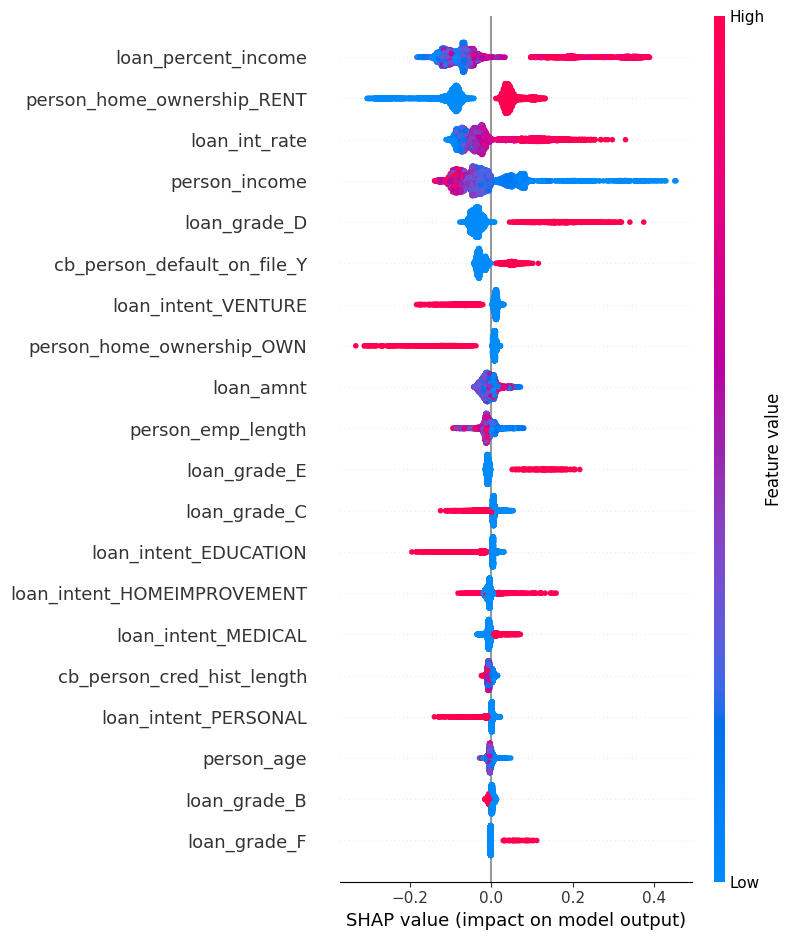

In [11]:
shap.summary_plot(shap_values_class1, X_test)

Bar plot

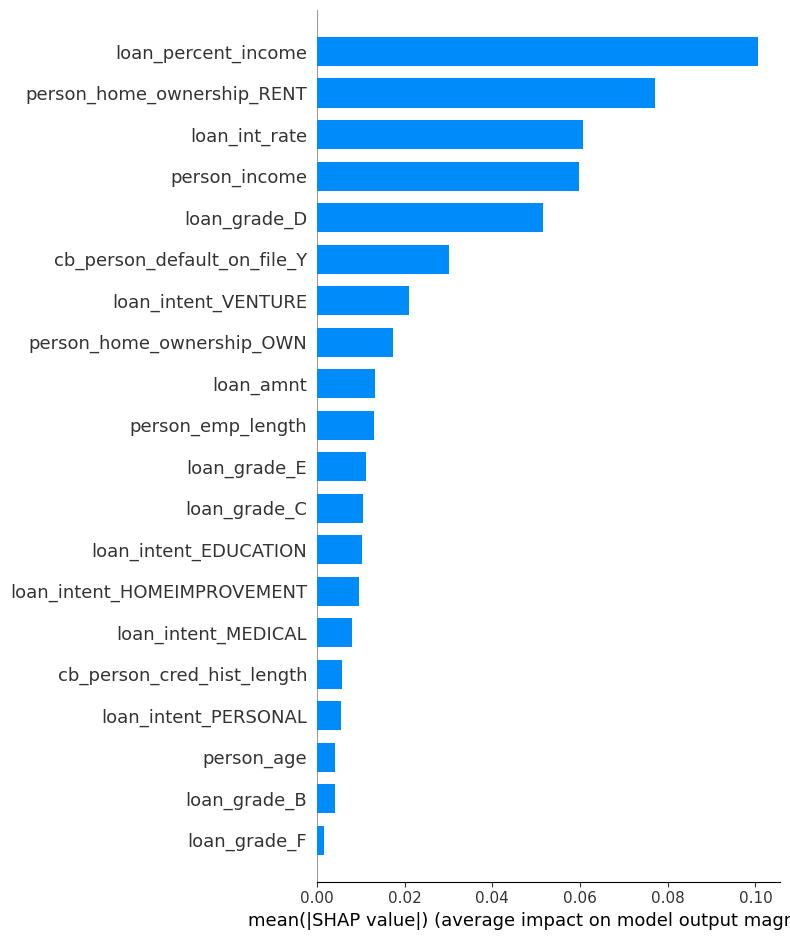

In [13]:

shap.summary_plot(
    shap_values_class1,
    X_test,
    plot_type="bar"
)

Feature Dependence Plot

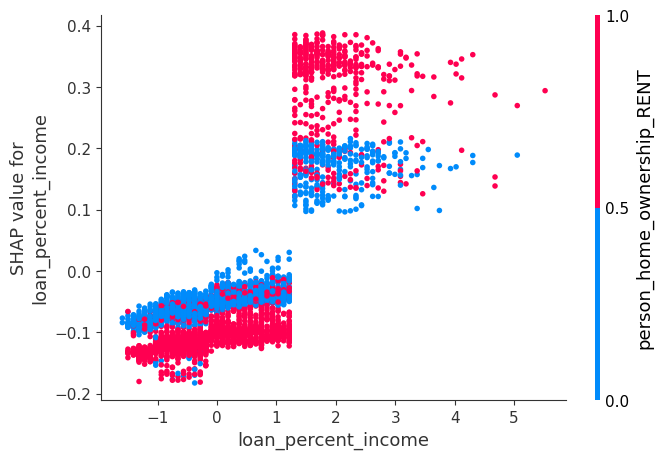

In [14]:

shap.dependence_plot(
    "loan_percent_income",
    shap_values_class1,
    X_test
)

Individual Prediction Explanation

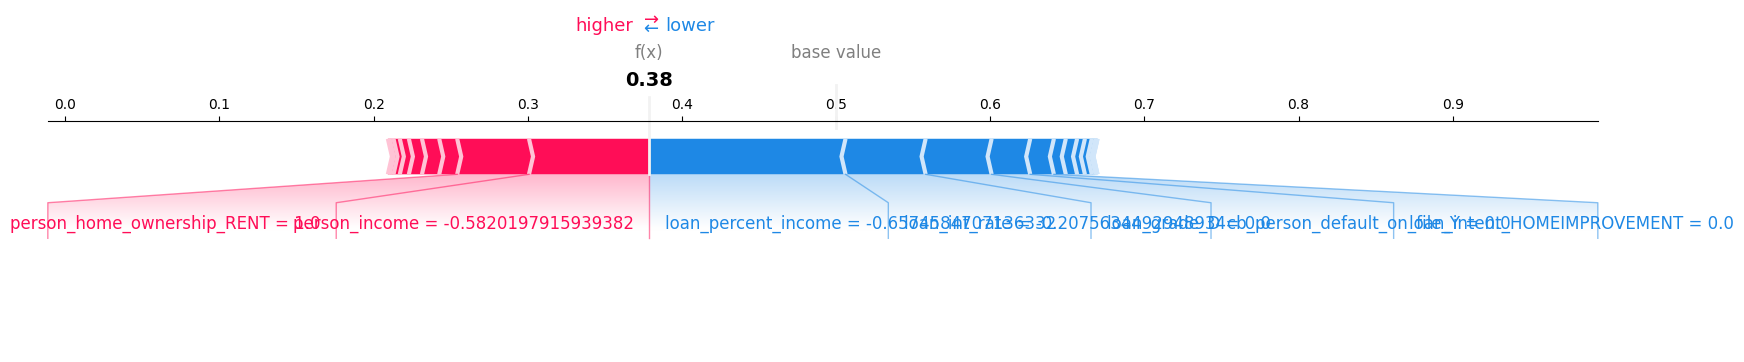

In [15]:

idx = 5

shap.force_plot(
    explainer.expected_value[1],
    shap_values_class1[idx],
    X_test.iloc[idx],
    matplotlib=True
)

Decision Plot

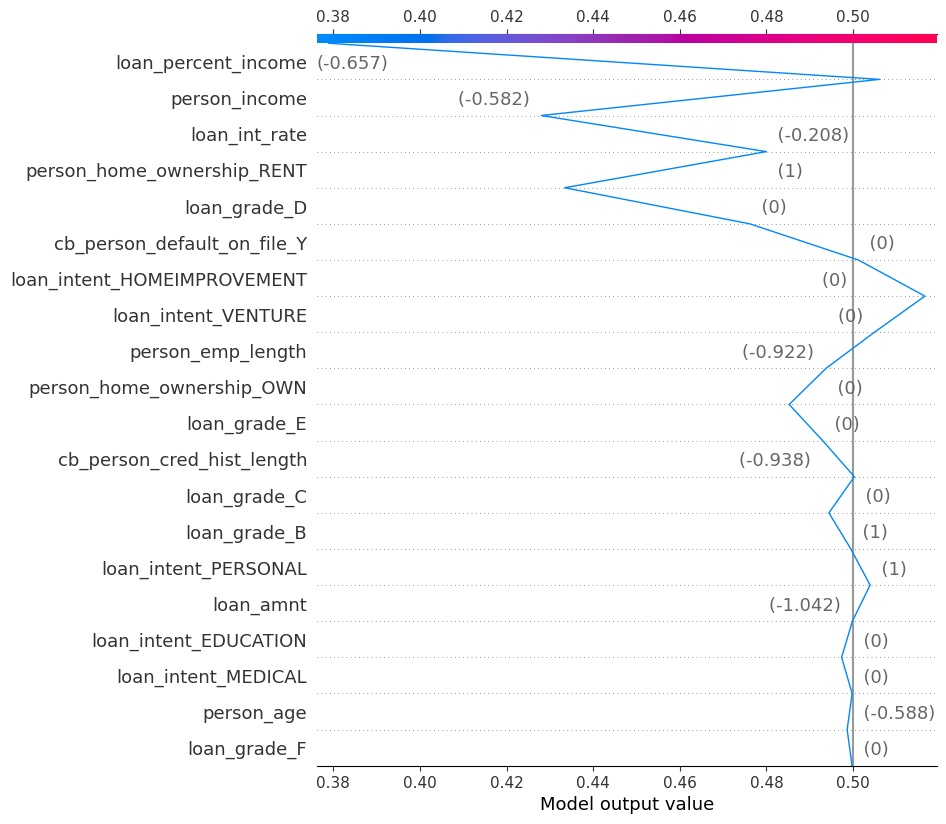

In [16]:

shap.decision_plot(
    explainer.expected_value[1],
    shap_values_class1[idx],
    X_test.iloc[idx]
)

## General Explanation

This notebook demonstrates the use of SHAP (SHapley Additive exPlanations) to interpret the predictions of a Random Forest credit risk model. It covers both global and local explanations:

*   **Global Explanations:**
    *   **Summary Plots (Beeswarm and Bar):** These plots provide an overview of feature importance across the entire dataset. The beeswarm plot shows the distribution of SHAP values for each feature, indicating how each feature influences the model's output and the direction of that influence. The bar plot quantifies the average impact of each feature.
    *   **Dependence Plots:** These plots illustrate how a single feature's value affects the model's prediction and can reveal interactions with other features.

*   **Local Explanations:**
    *   **Force Plots:** These visualize how individual features contribute to a specific prediction, pushing the model's output from the base value to the final prediction for that particular instance.
    *   **Decision Plots:** These show the path of a prediction, sequentially adding the impact of each feature from the base value to the final predicted output for a single instance.

By leveraging these SHAP visualizations, we can gain valuable insights into why a credit risk model makes certain predictions, fostering trust and transparency in AI-driven decision-making.